#    EVEN GOD HIMSELF CANNOT SINK THIS SHIP :  Edward John Smith!

![Titanic](https://assets.gqindia.com/photos/5cdc1173b6f0b3b382c7019a/4:3/w_1440,h_1080,c_limit/titanic-top-image.jpg)

In [940]:
# from IPython.display import YouTubeVideo

In [941]:
# id = 'AIJKvL99stU'
# YouTubeVideo(id=id, width=900, height =400)

# Project Problem Statement
In this Project, there are two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled `train.csv` and the other is titled `test.csv`.

Train.csv contains the details of a subset of the passengers on board (891 to be exact) and reveal whether they survived or not, also known as the “ground truth”.

The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s our job to predict these outcomes.

Using the patterns we find in the train.csv data, we want to predict whether the other 418 passengers on board (found in test.csv) survived.


The attributes have the following meaning:
* **PassengerId**: a unique identifier for each passenger
* **Survived**: that's the target, 0 means the passenger did not survive, while 1 means he/she survived.
* **Pclass**: passenger class.
* **Name**, **Sex**, **Age**: self-explanatory
* **SibSp**: how many siblings & spouses of the passenger aboard the Titanic.
* **Parch**: how many children & parents of the passenger aboard the Titanic.
* **Ticket**: ticket id
* **Fare**: price paid (in pounds)
* **Cabin**: passenger's cabin number
* **Embarked**: where the passenger embarked the Titanic

#  Importing libraries and data

In [859]:
import os
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 
import numpy as np
import pandas as pd
import pylab 
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.colors import ListedColormap
%matplotlib inline
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D
#import model_evaluation_utils as meu
from scipy.stats import skew, norm, probplot, boxcox
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import f_classif, chi2, SelectKBest, SelectFromModel
from sklearn.metrics import accuracy_score ,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from itertools import combinations
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
# import lightgbm as lgb
# import xgboost as xgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


## Loading the Data

In [860]:
import pandas as pd
train_dataset = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')


In [861]:
test_dataset['Survived'] = train_dataset['Survived']

# Concatenate train and test data together to perform exploratory analysis

In [862]:
Test_ID = test_dataset.PassengerId
Titanic = pd.concat([train_dataset, test_dataset], ignore_index=True)

# Exploratory Data Analysis (EDA) & Feature Engineering

In [863]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


#####  The field Name in the training and test data has the form "Braund, Mr. Owen Harris". Since name is unique for each passenger, it is not useful for our prediction system. However, a passenger's title can be extracted from his or her name.

In [864]:
data = [train_dataset, test_dataset]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train_dataset = train_dataset.drop(['Name'], axis=1)
test_dataset = test_dataset.drop(['Name'], axis=1)

In [865]:
Titanic_Full_data = Titanic.drop(columns=['Name', 'PassengerId'], axis=1).copy()

In [866]:
Titanic_Full_data['Title'] = dataset['Title']
Titanic_Full_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,3.0
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,1.0
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,3.0
...,...,...,...,...,...,...,...,...,...,...,...
1304,0,3,male,NaN,0,0,A.5. 3236,8.0500,NaN,S,NaN
1305,1,1,female,39.0,0,0,PC 17758,108.9000,C105,C,NaN
1306,0,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,NaN
1307,1,3,male,NaN,0,0,359309,8.0500,NaN,S,NaN


# Statistical Information of the data

In [867]:
Titanic_Full_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Title
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,418.000000
mean,0.385791,2.294882,29.881138,0.498854,0.385027,33.295479,1.741627
std,0.486968,0.837836,14.413493,1.041658,0.865560,51.758668,1.006091
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,1.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,2.000000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,5.000000


* Yikes, only 38% **Survived**! 😭 That's close enough to 40%, so accuracy will be a reasonable metric to evaluate our model.
* The mean **Fare** was £32.20, which does not seem so expensive (but it was probably a lot of money back then).
* The mean **Age** was less than 30 years old.

In [868]:
Titanic_Full_data['Class'] =Titanic_Full_data['Pclass']
Titanic_Full_data.loc[Titanic_Full_data['Class']==3, 'Class'] = 'Third'
Titanic_Full_data.loc[Titanic_Full_data['Class']==2, 'Class'] = 'Second'
Titanic_Full_data.loc[Titanic_Full_data['Class']==1, 'Class'] = 'First'


# Titanic_Full_data['Embarked_Town'] = Titanic_Full_data['Embarked']

# Titanic_Full_data.loc[Titanic_Full_data['Embarked_Town']=='S', 'Embarked_Town'] ='Southampton'
# Titanic_Full_data.loc[Titanic_Full_data['Embarked_Town']=='C', 'Embarked_Town'] ='Cherbourg'
# Titanic_Full_data.loc[Titanic_Full_data['Embarked_Town']=='Q', 'Embarked_Town'] ='Queenstown'


Titanic_Full_data['Alive'] = Titanic_Full_data['Survived']
Titanic_Full_data.loc[Titanic_Full_data['Alive']==1, 'Alive'] ='Yes'
Titanic_Full_data.loc[Titanic_Full_data['Alive']==0, 'Alive'] ='No'

Titanic_Full_data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Class,Alive
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0,Third,No
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,3.0,First,Yes
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,Third,Yes
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,1.0,First,Yes
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,3.0,Third,No


## Detail look at what Titanic_Full_data  is missing

In [869]:
total = Titanic_Full_data.isnull().sum().sort_values(ascending=False)
percent_1 = Titanic_Full_data.isnull().sum()/train_dataset.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(10)

,Total,%
Cabin,1014.0,113.8
Title,891.0,100.0
Age,263.0,29.5
Embarked,2.0,0.2
Fare,1.0,0.1
Survived,0.0,0.0
Pclass,0.0,0.0
Sex,0.0,0.0
SibSp,0.0,0.0
Parch,0.0,0.0


## Data Visualization

### --> Survived

We can now visualize the number of the survivors

<AxesSubplot:xlabel='Alive', ylabel='count'>

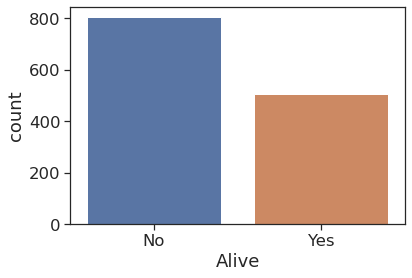

In [870]:
sns.countplot(Titanic_Full_data['Alive'])

### --> Title, Sex, Pclass, SibSp, Parch, Embarked

Visualizing the count of survivor for columns 'age', sex', 'class', 'sibsp', 'parch', 'embarked'

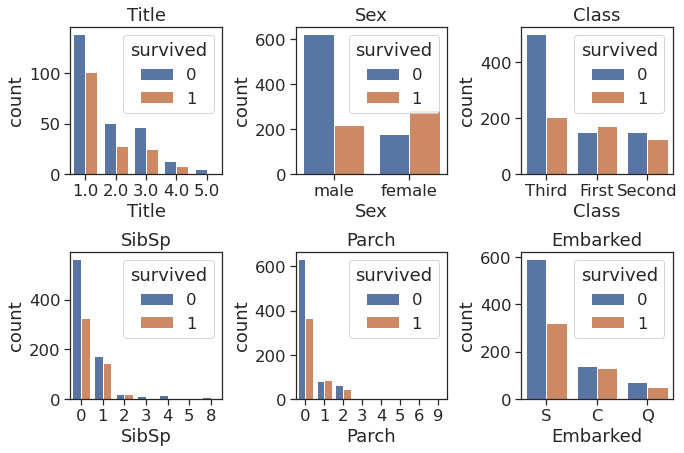

In [871]:
columns = [ 'Title','Sex', 'Class', 'SibSp', 'Parch', 'Embarked']

num_of_rows = 2 
num_of_columns = 3

#The subplot grid and figure size of each graph

fig, axs = plt.subplots(num_of_rows,num_of_columns, figsize = (num_of_columns*3.2,num_of_rows*3.2 ))

for row in range(0,num_of_rows):
    for column in range(0,num_of_columns):
        i = row*num_of_columns + column #Index to go through the number of columns
        ax = axs[row][column] # Show where to position each subplots
        sns.countplot(Titanic_Full_data[columns[i]], hue =Titanic_Full_data['Survived'] , ax=ax)
        ax.set_title(columns[i])
        ax.legend(title = 'survived', loc = 'upper right')
        
plt.tight_layout()

### --> Embarked, Pclass and Sex

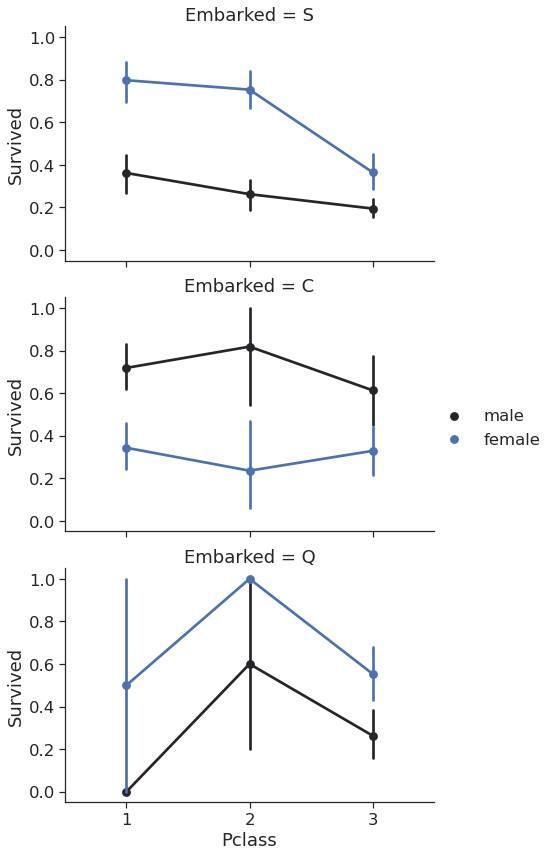

In [872]:
FacetGrid = sns.FacetGrid(Titanic_Full_data, row='Embarked', size=4, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()
plt.show()

### --> Relatives ( SibSp and Parch)
high probabilty of survival with 1 to 3 realitves, but a lower one if you had less than 1 or more than 3 (except for some cases with 6 relatives)

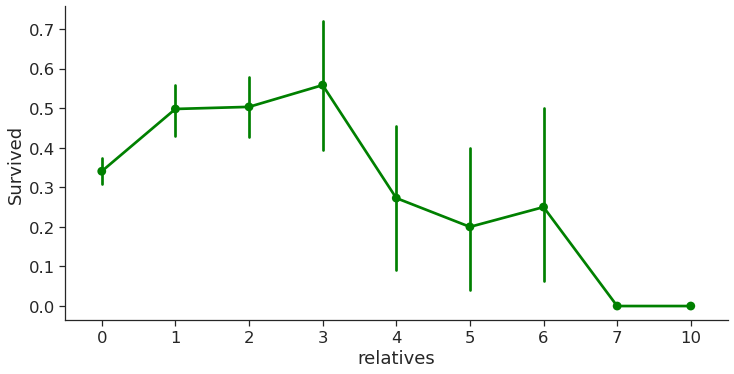

In [873]:
Titanic_Full_data['relatives'] = Titanic_Full_data['SibSp'] + Titanic_Full_data['Parch']
Titanic_Full_data.loc[Titanic_Full_data['relatives'] > 0, 'not_alone'] = 0
Titanic_Full_data.loc[Titanic_Full_data['relatives'] == 0, 'not_alone'] = 1
Titanic_Full_data['not_alone'] = Titanic_Full_data['not_alone'].astype(int)
Titanic_Full_data['not_alone'].value_counts()

axes = sns.factorplot('relatives','Survived', 
                      data=Titanic_Full_data, aspect = 2, color = 'green')

# Survival Rate by sex

In [874]:
Titanic_Full_data.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.61588
male,0.25860


# Survival rate by Sex and Class

In [875]:
Titanic_Full_data.pivot_table('Survived', index = 'Sex', columns ='Class')

Class,First,Second,Third
Sex,,,
female,0.756944,0.764151,0.449074
male,0.351955,0.269006,0.221095


## Survival rate by sex and class Virtually

<AxesSubplot:xlabel='Sex'>

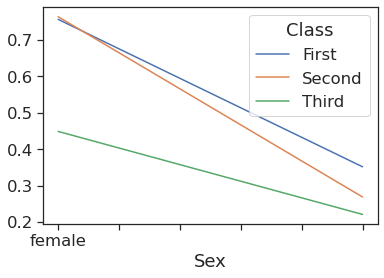

In [876]:
Titanic_Full_data.pivot_table('Survived', index = 'Sex', columns ='Class').plot()

# Survivor rate by Sex, Age, and Class

In [877]:
age = pd.cut(Titanic_Full_data['Age'], [0,18,80])
Titanic_Full_data.pivot_table('Survived',['Sex', age], 'Class')

Class               First    Second     Third
Sex    Age                                   
female (0, 18]   0.769231  0.666667  0.482759
       (18, 80]  0.741667  0.780488  0.414894
male   (0, 18]   0.500000  0.571429  0.277778
       (18, 80]  0.363636  0.218978  0.202166

## Plot the prices paid by each class

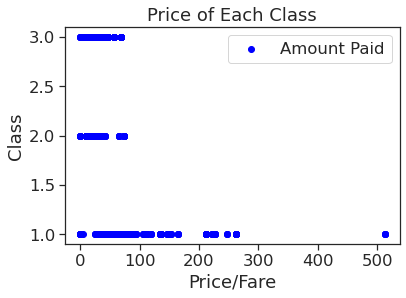

In [878]:
plt.scatter(Titanic_Full_data['Fare'], Titanic_Full_data['Pclass'], color ='blue', label='Amount Paid')
plt.ylabel('Class')
plt.xlabel('Price/Fare')
plt.title('Price of Each Class')
plt.legend()
plt.show()

In [879]:
Titanic_dataset=Titanic_Full_data.drop(columns = ['Title','Class','Alive', 'relatives','not_alone']).copy()
Titanic_dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,0,3,male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1,1,female,39.0,0,0,PC 17758,108.9000,C105,C
1306,0,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1,3,male,NaN,0,0,359309,8.0500,NaN,S


# Setting Features and Target

In [880]:
from sklearn.model_selection import train_test_split

Features = train_dataset.drop(['Survived'], axis = 1)
Target = train_dataset['Survived']

# Data Imputing / Cleaning

### Now let's build our preprocessing pipelines

#### Pipeline for numerical attributes:

In [881]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

### Pipeline for the categorical attributes:

In [882]:
from sklearn.preprocessing import OneHotEncoder

In [883]:
cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

#### Joining numerical and categorical pipelines

In [884]:
from sklearn.compose import ColumnTransformer

num_attribs = ["Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Pclass", "Sex", "Embarked"]

preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])


In [885]:
Attributes = preprocess_pipeline.fit_transform(
    Features[num_attribs + cat_attribs])
Attributes

array([[-0.56573646,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.66386103,  0.43279337, -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [-0.25833709, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.1046374 ,  0.43279337,  2.00893337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.25833709, -0.4745452 , -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.20276197, -0.4745452 , -0.47367361, ...,  0.        ,
         1.        ,  0.        ]])

# Splitting the Data into Training and Test Data

In [886]:
X_train, X_test, y_train, y_test = train_test_split(Attributes, Target, test_size=0.25, random_state=42)


# Machine Learning Model

In [887]:
def all_models(X_train, y_train):
    #Use Logistic Regression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, y_train)
    
    #Use KNeighbors
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p =2)
    knn.fit(X_train, y_train)
    
    #Use SVC (Linear Kernel)
    svc_lin = SVC(kernel = 'linear', random_state =0)
    svc_lin.fit(X_train, y_train)
    
    #Use SVC (RBF Kernel)
    svc_rbf = SVC(kernel = 'rbf', random_state =0)
    svc_rbf.fit(X_train, y_train)
    

    
    #Use GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, y_train)
    
    #Use Decision Tree
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state =0)
    tree.fit(X_train, y_train)
    
    #Use RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10, criterion = 'entropy', random_state =0)
    forest.fit(X_train, y_train)
    
    #Use LGBMClassifier
    lgb = LGBMClassifier()
    lgb.fit(X_train, y_train)
    
    #USe XGBClassifier
   
    #xgb = XGBClassifier()
    #xgb.fit(X_train, y_train)
    
    #Use SGDClassifier
    sgd = SGDClassifier()
    sgd.fit(X_train,y_train)
    
    #Use AdaBoostClassifier
    ada = AdaBoostClassifier()
    ada.fit(X_train, y_train)
    
    #Print the Accuracy for each model
    print('[0]Logistic Regression Training Accuracy: ', log.score(X_train, y_train))
    print('[1]K Neighbors Regression Training Accuracy: ', knn.score(X_train, y_train))
    print('[2]SVC Linear Training Accuracy: ', svc_lin.score(X_train, y_train))
    print('[3]SVC RBF Training Accuracy: ', svc_rbf.score(X_train, y_train))
    print('[4]GaussianNB Training Accuracy: ', gauss.score(X_train, y_train))
    print('[5]Decision Tree Training Accuracy: ', tree.score(X_train, y_train))
    print('[6]Random Forest Training Accuracy: ', forest.score(X_train, y_train))
    print('[7]LGBMClassifier Training Accuracy: ', lgb.score(X_train, y_train))
    #print('[8]XGBClassifier Training Accuracy: ', xgb.score(X_train, y_train))
    print('[8]SGDClassifier Training Accuracy: ', sgd.score(X_train, y_train))
    print('[9]AdaBoostClassifier Training Accuracy: ', ada.score(X_train, y_train))
    

    
    return log,knn,svc_lin,svc_rbf,gauss,tree,forest,lgb,sgd,ada
    

In [888]:
models = all_models(X_train, y_train)

[0]Logistic Regression Training Accuracy:  0.8068862275449101
[1]K Neighbors Regression Training Accuracy:  0.8607784431137725
[2]SVC Linear Training Accuracy:  0.7874251497005988
[3]SVC RBF Training Accuracy:  0.8383233532934131
[4]GaussianNB Training Accuracy:  0.7919161676646707
[5]Decision Tree Training Accuracy:  0.9805389221556886
[6]Random Forest Training Accuracy:  0.9640718562874252
[7]LGBMClassifier Training Accuracy:  0.9505988023952096
[8]SGDClassifier Training Accuracy:  0.8143712574850299
[9]AdaBoostClassifier Training Accuracy:  0.8368263473053892


In [889]:
df=pd.DataFrame(columns=['Name', 'train_accuracy', 'test_accuracy','Precision','Recall','Specificity'])

In [890]:
def train_test_evaluate_model(model,name):
    global df
    print("------------------------------------------------------------------------------------")
    print(name)
    model.fit(X_train,y_train)
    print("Train score :")
    train_score=model.score(X_train,y_train)
    print(train_score)
    predict= model.predict(X_test)
    print("Test score :")
    test_score=accuracy_score(y_test,predict)
    print(test_score)
    print("Confusion Matrix :")
    print(confusion_matrix(y_test,predict))
    print("Classification Report :")
    print(classification_report(y_test,predict))
#     print(scores)

    
    confusion__matrix = pd.crosstab(y_test,predict , rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(confusion__matrix, annot=True)
    plt.show()
    cm=confusion_matrix(y_test,predict)
    tp = cm[1,1]
    tn = cm[0,0]
    fp = cm[0,1]
    fn = cm[1,0]
    print("Accuracy : ",(tp+tn)/(tp+tn+fp+fn))
    print("Precision : ",(tp)/(tp+fp))
    print("Recall/TPR/Sensitivity : ",(tp)/(tp+fn))
    print("Specificity/TNR : ",(tn)/(tn+fp))
    print("------------------------------------------------------------------------------------")
    new_row = {'Name':name, 'train_accuracy': train_score , 'test_accuracy': test_score ,'Precision': (tp)/(tp+fp) \
               ,'Recall': (tp)/(tp+fn) ,'Specificity': (tn)/(tn+fp) }
    #append row to the dataframe
    df = df.append(new_row, ignore_index=True)

# LogisticRegression

------------------------------------------------------------------------------------
LogisticRegression
Train score :
0.8068862275449101
Test score :
0.7982062780269058
Confusion Matrix :
[[115  19]
 [ 26  63]]
Classification Report :
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       134
           1       0.77      0.71      0.74        89

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.79       223
weighted avg       0.80      0.80      0.80       223



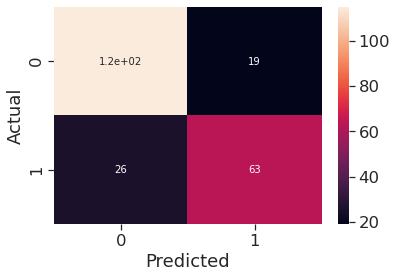

Accuracy :  0.7982062780269058
Precision :  0.7682926829268293
Recall/TPR/Sensitivity :  0.7078651685393258
Specificity/TNR :  0.8582089552238806
------------------------------------------------------------------------------------


In [891]:
train_test_evaluate_model(LogisticRegression(solver='lbfgs', max_iter=1200),"LogisticRegression")

# DecisionTreeClassifier

------------------------------------------------------------------------------------
DecisionTreeClassifier
Train score :
0.9805389221556886
Test score :
0.7174887892376681
Confusion Matrix :
[[104  30]
 [ 33  56]]
Classification Report :
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       134
           1       0.65      0.63      0.64        89

    accuracy                           0.72       223
   macro avg       0.71      0.70      0.70       223
weighted avg       0.72      0.72      0.72       223



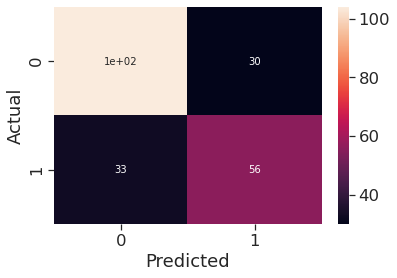

Accuracy :  0.7174887892376681
Precision :  0.6511627906976745
Recall/TPR/Sensitivity :  0.6292134831460674
Specificity/TNR :  0.7761194029850746
------------------------------------------------------------------------------------


In [892]:
from sklearn.tree import DecisionTreeClassifier
train_test_evaluate_model(DecisionTreeClassifier(criterion='entropy'),"DecisionTreeClassifier")

# RandomForestClassifier

------------------------------------------------------------------------------------
RandomForestClassifier
Train score :
0.9491017964071856
Test score :
0.7847533632286996
Confusion Matrix :
[[109  25]
 [ 23  66]]
Classification Report :
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       134
           1       0.73      0.74      0.73        89

    accuracy                           0.78       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.78      0.79       223



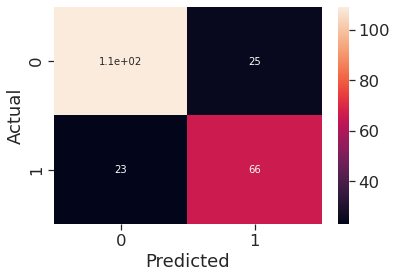

Accuracy :  0.7847533632286996
Precision :  0.7252747252747253
Recall/TPR/Sensitivity :  0.7415730337078652
Specificity/TNR :  0.8134328358208955
------------------------------------------------------------------------------------


In [893]:
from sklearn.ensemble import RandomForestClassifier
train_test_evaluate_model(RandomForestClassifier(n_estimators=5),"RandomForestClassifier")

# KNeighborsClassifier

------------------------------------------------------------------------------------
KNeighborsClassifier
Train score :
0.8607784431137725
Test score :
0.8116591928251121
Confusion Matrix :
[[117  17]
 [ 25  64]]
Classification Report :
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       134
           1       0.79      0.72      0.75        89

    accuracy                           0.81       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223



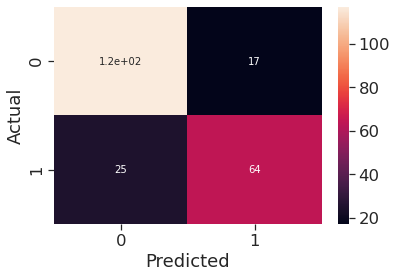

Accuracy :  0.8116591928251121
Precision :  0.7901234567901234
Recall/TPR/Sensitivity :  0.7191011235955056
Specificity/TNR :  0.8731343283582089
------------------------------------------------------------------------------------


In [894]:
from sklearn.neighbors import KNeighborsClassifier
train_test_evaluate_model(KNeighborsClassifier(n_neighbors=5),"KNeighborsClassifier")

# GaussianNB

------------------------------------------------------------------------------------
GaussianNB
Train score :
0.7919161676646707
Test score :
0.7847533632286996
Confusion Matrix :
[[106  28]
 [ 20  69]]
Classification Report :
              precision    recall  f1-score   support

           0       0.84      0.79      0.82       134
           1       0.71      0.78      0.74        89

    accuracy                           0.78       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.78      0.79       223



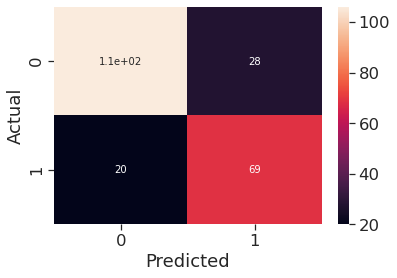

Accuracy :  0.7847533632286996
Precision :  0.711340206185567
Recall/TPR/Sensitivity :  0.7752808988764045
Specificity/TNR :  0.7910447761194029
------------------------------------------------------------------------------------


In [895]:
from sklearn.naive_bayes import GaussianNB
train_test_evaluate_model(GaussianNB(),"GaussianNB")

# SVC

------------------------------------------------------------------------------------
SVC
Train score :
0.8383233532934131
Test score :
0.820627802690583
Confusion Matrix :
[[118  16]
 [ 24  65]]
Classification Report :
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       134
           1       0.80      0.73      0.76        89

    accuracy                           0.82       223
   macro avg       0.82      0.81      0.81       223
weighted avg       0.82      0.82      0.82       223



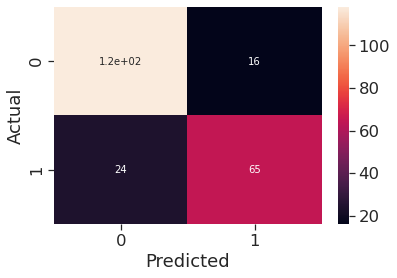

Accuracy :  0.820627802690583
Precision :  0.8024691358024691
Recall/TPR/Sensitivity :  0.7303370786516854
Specificity/TNR :  0.8805970149253731
------------------------------------------------------------------------------------


In [896]:
from sklearn.svm import SVC
train_test_evaluate_model(SVC(),"SVC")

# AdaBoostClassifier

------------------------------------------------------------------------------------
AdaBoostClassifier
Train score :
0.8368263473053892
Test score :
0.7892376681614349
Confusion Matrix :
[[110  24]
 [ 23  66]]
Classification Report :
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       134
           1       0.73      0.74      0.74        89

    accuracy                           0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



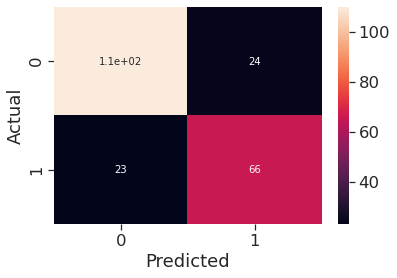

Accuracy :  0.7892376681614349
Precision :  0.7333333333333333
Recall/TPR/Sensitivity :  0.7415730337078652
Specificity/TNR :  0.8208955223880597
------------------------------------------------------------------------------------


In [897]:
train_test_evaluate_model(AdaBoostClassifier(),"AdaBoostClassifier")

# SGDClassifier

------------------------------------------------------------------------------------
SGDClassifier
Train score :
0.7934131736526946
Test score :
0.7713004484304933
Confusion Matrix :
[[114  20]
 [ 31  58]]
Classification Report :
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       134
           1       0.74      0.65      0.69        89

    accuracy                           0.77       223
   macro avg       0.76      0.75      0.76       223
weighted avg       0.77      0.77      0.77       223



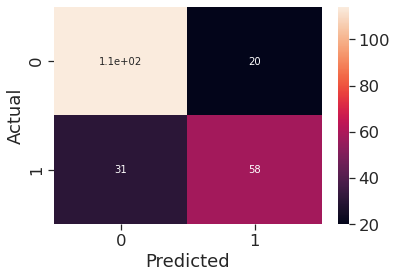

Accuracy :  0.7713004484304933
Precision :  0.7435897435897436
Recall/TPR/Sensitivity :  0.651685393258427
Specificity/TNR :  0.8507462686567164
------------------------------------------------------------------------------------


In [898]:
train_test_evaluate_model(SGDClassifier(),"SGDClassifier")

# LGBMClassifier

------------------------------------------------------------------------------------
LGBMClassifier
Train score :
0.9505988023952096
Test score :
0.8116591928251121
Confusion Matrix :
[[114  20]
 [ 22  67]]
Classification Report :
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       134
           1       0.77      0.75      0.76        89

    accuracy                           0.81       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223



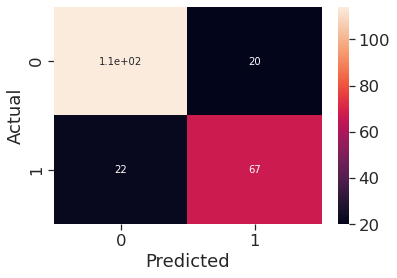

Accuracy :  0.8116591928251121
Precision :  0.7701149425287356
Recall/TPR/Sensitivity :  0.7528089887640449
Specificity/TNR :  0.8507462686567164
------------------------------------------------------------------------------------


In [899]:
train_test_evaluate_model(LGBMClassifier(),"LGBMClassifier")

In [900]:
df

,Name,train_accuracy,test_accuracy,Precision,Recall,Specificity
0,LogisticRegression,0.806886,0.798206,0.768293,0.707865,0.858209
1,DecisionTreeClassifier,0.980539,0.717489,0.651163,0.629213,0.776119
2,RandomForestClassifier,0.949102,0.784753,0.725275,0.741573,0.813433
3,KNeighborsClassifier,0.860778,0.811659,0.790123,0.719101,0.873134
4,GaussianNB,0.791916,0.784753,0.711340,0.775281,0.791045
5,SVC,0.838323,0.820628,0.802469,0.730337,0.880597
6,AdaBoostClassifier,0.836826,0.789238,0.733333,0.741573,0.820896
7,SGDClassifier,0.793413,0.771300,0.743590,0.651685,0.850746
8,LGBMClassifier,0.950599,0.811659,0.770115,0.752809,0.850746


### Evaluation Using Cross-Validation

In [901]:
from sklearn.model_selection import cross_val_score

In [902]:
score = np.zeros((9,2))
mean_score =[]
allscores =[]
model = [LogisticRegression(),DecisionTreeClassifier(),
         RandomForestClassifier(),KNeighborsClassifier(),GaussianNB(),SVC(),
         SGDClassifier(),AdaBoostClassifier(),LGBMClassifier()]
for i in model:
    scores = cross_val_score(i, X_train, y_train, cv=10)
    mean = scores.mean()
    allscores.append(scores)
    mean_score.append(mean)
    print('{}: {}'.format(i, scores.mean()))
    

LogisticRegression(): 0.799502487562189
DecisionTreeClassifier(): 0.7695612844866575
RandomForestClassifier(): 0.795070104025328
KNeighborsClassifier(): 0.7889416553595658
GaussianNB(): 0.784486657620986
SVC(): 0.8248982360922659
SGDClassifier(): 0.7365897783808232
AdaBoostClassifier(): 0.8128674807779286
LGBMClassifier(): 0.817412935323383


In [903]:
np.savetxt('My_Score', score)
Score_data = np.loadtxt('My_Score')
My_Scores = pd.DataFrame(Score_data, columns = ['Models', 'Cross Validation Scores'])

My_Scores['Models'] = model
My_Scores['Cross Validation Scores'] = mean_score
#My_Scores['Best']= ['','','','','','Best Model','','',"Second Best",'']
My_Scores



,Models,Cross Validation Scores
0,LogisticRegression(),0.799502
1,DecisionTreeClassifier(),0.769561
2,RandomForestClassifier(),0.795070
3,KNeighborsClassifier(),0.788942
4,GaussianNB(),0.784487
5,SVC(),0.824898
6,SGDClassifier(),0.736590
7,AdaBoostClassifier(),0.812867
8,LGBMClassifier(),0.817413


## Compare Training Accuracy after Cross Validation with Testing Accuracy

In [904]:
Accurracy_Score = np.zeros((9,3))

In [905]:
Accurracy_Score[:,0] = df['train_accuracy']
Accurracy_Score[:,1]=My_Scores['Cross Validation Scores']
Accurracy_Score[:,2] = df['test_accuracy']

np.savetxt('Accuracy_Scores', Accurracy_Score)
data_accuracy = np.loadtxt('Accuracy_Scores')

Accuracy_data = pd.DataFrame(data_accuracy, columns=['train_accuracy', 'Cross Validation', 'test_accuracy'])
Accuracy_data['Model'] = df['Name']
Accuracy_data



,train_accuracy,Cross Validation,test_accuracy,Model
0,0.806886,0.799502,0.798206,LogisticRegression
1,0.980539,0.769561,0.717489,DecisionTreeClassifier
2,0.949102,0.795070,0.784753,RandomForestClassifier
3,0.860778,0.788942,0.811659,KNeighborsClassifier
4,0.791916,0.784487,0.784753,GaussianNB
5,0.838323,0.824898,0.820628,SVC
6,0.836826,0.736590,0.789238,AdaBoostClassifier
7,0.793413,0.812867,0.771300,SGDClassifier
8,0.950599,0.817413,0.811659,LGBMClassifier


But instead of just looking at the mean accuracy across the 10 cross-validation folds, let's plot all 10 scores for each model, along with a box plot highlighting the lower and upper quartiles, and "whiskers" showing the extent of the scores (thanks to Nevin Yilmaz for suggesting this visualization). Note that the `boxplot()` function detects outliers (called "fliers") and does not include them within the whiskers. Specifically, if the lower quartile is $Q_1$ and the upper quartile is $Q_3$, then the interquartile range $IQR = Q_3 - Q_1$ (this is the box's height), and any score lower than $Q_1 - 1.5 \times IQR$ is a flier, and so is any score greater than $Q3 + 1.5 \times IQR$.

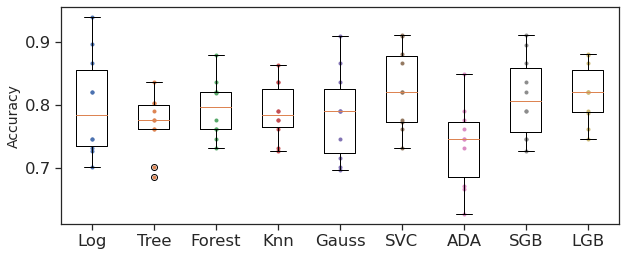

In [906]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot([1]*10, allscores[0], ".")
plt.plot([2]*10, allscores[1], ".")
plt.plot([3]*10, allscores[2], ".")
plt.plot([4]*10, allscores[3], ".")
plt.plot([5]*10, allscores[4], ".")
plt.plot([6]*10, allscores[5], ".")
plt.plot([7]*10, allscores[6], ".")
plt.plot([8]*10, allscores[7], ".")
plt.plot([9]*10, allscores[8], ".")
#plt.plot([10]*10, allscores[9], ".")
plt.boxplot([allscores[0], allscores[1],allscores[2],allscores[3],allscores[4],allscores[5]
             ,allscores[6],allscores[7],allscores[8]],
             labels=("Log","Tree",'Forest','Knn','Gauss','SVC','ADA','SGB','LGB'))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

In [907]:
def get_results(model, name, results=None, data=X_train, reasume=False):
    modelo = model.fit(data, y_train)
    print('Mean Best Accuracy: {:2.2%}'.format(gs.best_score_))
    print(gs.best_params_,'\n')
    best = gs.best_estimator_
    param_grid = best
    y_pred = model.predict(data)
    print('Accuracy:', np.round(metrics.accuracy_score(y_train,y_pred),4))
    print('Precision:', np.round(metrics.precision_score(y_train,y_pred,average='weighted'),4))
    print('Recall:', np.round(metrics.recall_score(y_train,y_pred,average='weighted'),4))
    print('F1 Score:', np.round(metrics.f1_score(y_train,y_pred,average='weighted'),4))
    report = metrics.classification_report(y_true=y_train, y_pred=y_pred) 
    print(report)
#     meu.display_model_performance_metrics(true_labels=y_train, predicted_labels=y_pred)
#     print('\n\n              ROC AUC Score: {:2.2%}'.format(roc_auc_score(y_true=y_train, y_score=y_pred)))
    if hasattr(param_grid, 'predict_proba'):
        prob = model.predict_proba(data)
        score_roc = prob[:, prob.shape[1]-1] 
        prob = True
    elif hasattr(param_grid, 'decision_function'):
                score_roc = model.decision_function(X_train)
                prob = False
    else:
        raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")
    fpr, tpr, thresholds = roc_curve(y_true=y_train, y_score=score_roc)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.plot(fpr, tpr, 'b', label='AUC = {:2.2%}'.format(roc_auc))
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.show()

    r1 = pd.DataFrame([(prob, gs.best_score_, np.round(accuracy_score(y_train, y_pred), 4), 
                             roc_auc_score(y_true=y_train, y_score=y_pred), roc_auc)], index = [name],
                             columns = ['Prob', 'CV Accuracy', 'Acc All', 'ROC AUC Score', 'ROC Area'])
    if reasume:
        results = r1
    elif (name in results.index):
        results.loc[[name], :] = r1
    else: 
        results = results.append(r1)
    return results, modelo

# Fine-Tuning the Model LogisticRegression

Fitting 5 folds for each of 304 candidates, totalling 1520 fits
Mean Best Accuracy: 81.13%
{'clf__C': 0.009, 'clf__max_iter': 2, 'clf__penalty': 'l2', 'clf__solver': 'newton-cg', 'clf__tol': 0.001} 

Accuracy: 0.8039
Precision: 0.8026
Recall: 0.8039
F1 Score: 0.7996
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       415
           1       0.79      0.66      0.72       253

    accuracy                           0.80       668
   macro avg       0.80      0.78      0.78       668
weighted avg       0.80      0.80      0.80       668



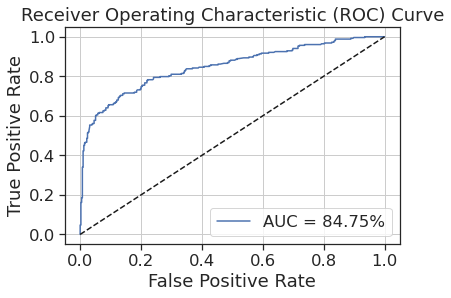

In [908]:
clf = Pipeline([('clf', LogisticRegression(random_state=101))]) 
n_components= [25, 22, 31, 54]
whiten = [True, False]
C =  [0.008, 0.007, 0.009, 0.01]#, 0.1, 1.0, 10.0, 100.0, 1000.0]
tol = [0.001, 0.003, 0.002, 0.005]

param_grid =[{'clf__C': C,'clf__solver': ['liblinear', 'saga'] ,'clf__penalty': ['l1', 'l2'],'clf__tol' : tol 
              ,'clf__class_weight': ['balanced']},{'clf__C': C,'clf__max_iter': [3, 9, 2, 7, 4]
                                                   ,'clf__solver': ['newton-cg', 'sag', 'lbfgs']
                                                   ,'clf__penalty': ['l2'],'clf__tol' : tol  }]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=3)
# gs.fit(X_train,y_train)

main_pip = Pipeline([('scl', StandardScaler()),
                     ('lda', LDA(store_covariance=True)),
                     ('gs', gs)])  

results, lr = get_results(main_pip, 'LogisticRegression', reasume=True)
    


# Fine-Tuning the Model Support Vector Classification

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mean Best Accuracy: 79.79%
{'clf__C': 0.05, 'clf__class_weight': 'balanced', 'clf__dual': True, 'clf__loss': 'hinge', 'clf__max_iter': 9, 'clf__penalty': 'l2', 'clf__tol': 1e-06} 

Accuracy: 0.7979
Precision: 0.7967
Recall: 0.7979
F1 Score: 0.7972
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       415
           1       0.74      0.72      0.73       253

    accuracy                           0.80       668
   macro avg       0.79      0.78      0.78       668
weighted avg       0.80      0.80      0.80       668



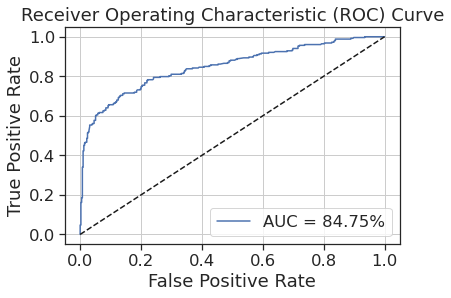

In [909]:
clf = Pipeline([
            #('pca', PCA(random_state = 101)),
            ('clf', LinearSVC(random_state=101))])

    # a list of dictionaries to specify the parameters that we'd want to tune
n_components= [25, 22, 31, 54]
whiten = [True, False]
C =  [0.5, 0.3, 0.05, 0.1] #, 1.0, 10.0, 100.0, 1000.0]
tol = [1e-06, 3e-06, 5e-07]
max_iter = [9, 15, 7]

param_grid =\
        [{'clf__loss': ['hinge']
         ,'clf__tol': tol
         ,'clf__C': C
         ,'clf__penalty': ['l2']
         ,'clf__class_weight' : ['balanced'] 
         ,'clf__max_iter' : max_iter
         ,'clf__dual' : [True]
         #,'pca__n_components' : n_components
         #,'pca__whiten' : whiten
         }
        ,{'clf__loss': ['squared_hinge']
         ,'clf__tol': tol
         ,'clf__C': C
         ,'clf__penalty': ['l2', 'l1']
         ,'clf__class_weight' : ['balanced'] 
         ,'clf__max_iter' : max_iter
         ,'clf__dual' : [False]
         #,'pca__n_components' : n_components
         #,'pca__whiten' : whiten
         }]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=3)
main_pip = Pipeline([
            
            ('scl', StandardScaler()),
            ('lda', LDA(store_covariance=True)),
            ('gs', gs)
     ])  

results, lsvc = get_results(main_pip, 'LinearSVC', results)

# Fine-Tuning the Model RandomForestClassifier

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mean Best Accuracy: 81.29%
{'clf__class_weight': 'balanced', 'clf__criterion': 'gini', 'clf__min_impurity_split': 0.05, 'clf__min_samples_split': 5, 'clf__n_estimators': 500} 

Accuracy: 0.9416
Precision: 0.9415
Recall: 0.9416
F1 Score: 0.9415
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       415
           1       0.93      0.92      0.92       253

    accuracy                           0.94       668
   macro avg       0.94      0.94      0.94       668
weighted avg       0.94      0.94      0.94       668



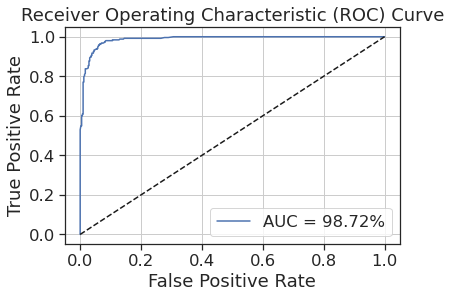

In [910]:
clf = Pipeline([
            #('pca', PCA(random_state = 101)),
            ('clf', RandomForestClassifier(random_state=101))])

    # a list of dictionaries to specify the parameters that we'd want to tune
n_components= [25, 22, 31, 54]
whiten = [True, False]
param_grid =\
        [{'clf__n_estimators' : [500, 3000]
          ,'clf__criterion': ['gini', 'entropy']
          ,'clf__min_samples_split': [4, 3, 5]
          ,'clf__min_impurity_split': [0.05, 0.03, 0.07]
          #,'clf__max_depth': [5, 10]
          #,'clf__min_impurity_decrease': [0.0003]
          #,'clf__min_samples_leaf': [1,2,3,4]
          ,'clf__class_weight': ['balanced']
          #,'clf__bootstrap': [True, False]
         #,'pca__n_components' : n_components
         #,'pca__whiten' : whiten
         }]

# sele = bcols
gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=3)
main_pip = Pipeline([
            ('scl', StandardScaler()),
            ('gs', gs)
     ])  

results, rfc = get_results(main_pip, 'RandomForestClassifier', results)

# Fine-Tuning the Model KNeighborsClassifier

Fitting 5 folds for each of 128 candidates, totalling 640 fits
Mean Best Accuracy: 80.08%
{'clf__algorithm': 'ball_tree', 'clf__leaf_size': 12, 'clf__n_neighbors': 9, 'clf__p': 1, 'clf__weights': 'uniform'} 

Accuracy: 0.8189
Precision: 0.8197
Recall: 0.8189
F1 Score: 0.814
              precision    recall  f1-score   support

           0       0.82      0.92      0.86       415
           1       0.83      0.66      0.73       253

    accuracy                           0.82       668
   macro avg       0.82      0.79      0.80       668
weighted avg       0.82      0.82      0.81       668



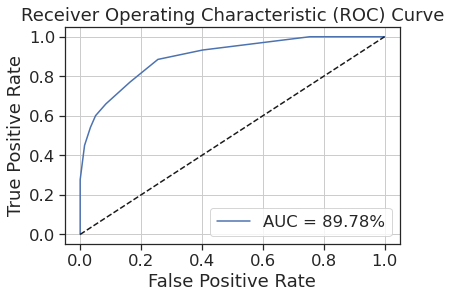

In [911]:
clf = Pipeline([
            #('pca', PCA(random_state = 101)),
            ('clf', KNeighborsClassifier())])

    #max_iter_predict=500, n_restarts_optimizer=5
    # a list of dictionaries to specify the parameters that we'd want to tune
n_components= [25, 22, 31, 54]
whiten = [True, False]
param_grid =\
        [{'clf__n_neighbors': [3, 7, 8, 9] #
         ,'clf__weights': ['uniform', 'distance'] 
         ,'clf__algorithm' : ['ball_tree', 'kd_tree'] # ['auto', 'ball_tree', 'kd_tree', 'brute']
         ,'clf__leaf_size': [12, 15, 16, 20]
         ,'clf__p': [1, 2] 
         #,'pca__n_components' : n_components
         #,'pca__whiten' : whiten
         }]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=3)
main_pip = Pipeline([
            ('scl', StandardScaler()),
            ('lda', LDA(store_covariance=True)),
            ('gs', gs)
     ])  

results, KNNC = get_results(main_pip, 'KNeighborsClassifier', results)

# Fine-Tuning the Model SGDClassifier

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Mean Best Accuracy: 79.94%
{'clf__alpha': 0.001, 'clf__class_weight': 'balanced', 'clf__loss': 'hinge', 'clf__penalty': 'l1', 'clf__tol': 1e-08} 

Accuracy: 0.7979
Precision: 0.7967
Recall: 0.7979
F1 Score: 0.7972
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       415
           1       0.74      0.72      0.73       253

    accuracy                           0.80       668
   macro avg       0.79      0.78      0.78       668
weighted avg       0.80      0.80      0.80       668



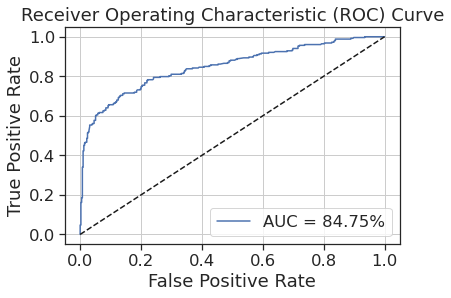

In [912]:
clf = Pipeline([
            #('pca', PCA(random_state = 101)),
            ('clf', SGDClassifier(random_state=101))])

    # a list of dictionaries to specify the parameters that we'd want to tune
n_components= [30, 22, 21, 50]
whiten = [True, False]
alpha = [4e-03, 5e-03, 6e-03, 1e-03]
tol = [1e-08, 1e-07, 5e-09]

param_grid =\
        [{'clf__loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']
         ,'clf__tol': tol
         ,'clf__alpha': alpha
         ,'clf__penalty': ['l2', 'l1']
         ,'clf__class_weight' : ['balanced'] 
         #,'pca__n_components' : n_components
         #,'pca__whiten' : whiten
         },
        {'clf__loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']
         ,'clf__tol': tol
         ,'clf__alpha': alpha
         ,'clf__penalty': ['elasticnet']
         ,'clf__l1_ratio' : [0.3, 0.5, 0.1]
         ,'clf__class_weight' : ['balanced'] 
         #,'pca__n_components' : n_components
         #,'pca__whiten' : whiten
         }]


gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=3)
main_pip = Pipeline([
            ('scl', StandardScaler()),
            ('lda', LDA(store_covariance=True)),
            ('gs', gs)
     ])  

results, svm = get_results(main_pip, 'SGDClassifier', results)

# Fine-Tuning the Model AdaBoostClassifier

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Mean Best Accuracy: 80.99%
{'clf__algorithm': 'SAMME', 'clf__learning_rate': 0.15, 'clf__n_estimators': 300} 

Accuracy: 0.8174
Precision: 0.8273
Recall: 0.8174
F1 Score: 0.8082
              precision    recall  f1-score   support

           0       0.80      0.95      0.87       415
           1       0.88      0.60      0.71       253

    accuracy                           0.82       668
   macro avg       0.84      0.78      0.79       668
weighted avg       0.83      0.82      0.81       668



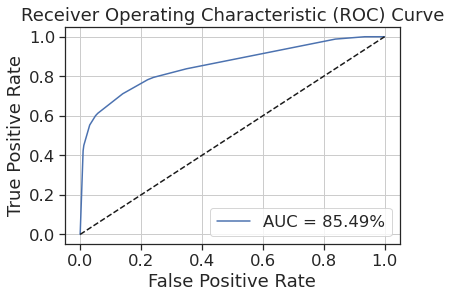

In [913]:
clf = Pipeline([
            #('pca', PCA(random_state = 101)),
            ('clf', AdaBoostClassifier(random_state=101))])
    # , max_iter_predict=500, n_restarts_optimizer=5

    # a list of dictionaries to specify the parameters that we'd want to tune
n_components= [25, 22, 31, 54]
whiten = [True, False]

param_grid =\
        [{'clf__learning_rate': [3e-03, 15e-02, 5e-02]
         ,'clf__n_estimators': [300, 350, 400, 500] # np.arange(96,115)
         ,'clf__algorithm' : ['SAMME', 'SAMME.R']
         #,'pca__n_components' : n_components
         #,'pca__whiten' : whiten
         }]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=3)
main_pip = Pipeline([
            
            ('scl', StandardScaler()),
            ('lda', LDA(store_covariance=True)),
            ('gs', gs)
     ])  

results, AdaB = get_results(main_pip, 'AdaBoostClassifier', results)

### Check the best results from the models hyper parametrization

In [914]:
display(results.sort_values(by='ROC Area', ascending=False))

,Prob,CV Accuracy,Acc All,ROC AUC Score,ROC Area
RandomForestClassifier,True,0.812917,0.9416,0.936811,0.987152
KNeighborsClassifier,True,0.800830,0.8189,0.787871,0.897828
AdaBoostClassifier,True,0.809853,0.8174,0.775094,0.854922
LogisticRegression,True,0.811346,0.8039,0.775051,0.847469
LinearSVC,False,0.797879,0.7979,0.781804,0.847469
SGDClassifier,False,0.799360,0.7979,0.781804,0.847469


In [915]:
# X_test

In [916]:
X_test= test_dataset.drop(columns =['Survived','PassengerId'])

In [931]:
X_data_test = preprocess_pipeline.transform(X_test[num_attribs + cat_attribs])
X_test_Prediction = models[2].predict(X_data_test)

#clf =RandomForestClassifier()
# X_data_test = preprocess_pipeline.transform(X_test[num_attribs + cat_attribs])
# X_test_Prediction = clf.predict(X_data_test)

In [932]:
X_test_Prediction

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [933]:
MySurvival = pd.DataFrame(test_dataset['PassengerId'])
MySurvival['Survived'] = X_test_Prediction

MySurvival.to_csv('predictions.csv', index=False)

### Results

In [935]:
MyResult = pd.read_csv('predictions.csv')

In [936]:
MyResult['Outcome'] = MyResult['Survived']

In [937]:
MyResult.loc[MyResult['Survived']== 0, 'Outcome']='Dead 😭'
MyResult.loc[MyResult['Survived']== 1, 'Outcome']='Alive 🤩'

In [938]:
MyResult.head(20)

,PassengerId,Survived,Outcome
0,892,0,Dead 😭
1,893,1,Alive 🤩
2,894,0,Dead 😭
3,895,0,Dead 😭
4,896,1,Alive 🤩
5,897,0,Dead 😭
6,898,1,Alive 🤩
7,899,0,Dead 😭
8,900,1,Alive 🤩
9,901,0,Dead 😭
